In [1]:
from qiskit import QuantumRegister, ClassicalRegister, BasicAer
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import NormalDistribution,UniformDistribution,LogNormalDistribution
from kaleidoscope import qsphere, probability_distribution

In [2]:
#provider = IBMQ.load_account()
#backend = provider.get_backend('ibmq_qasm_simulator')
backend = BasicAer.get_backend('qasm_simulator')

qubits = 5

## Normal Distribution

A circuit to encode a discretized normal distribution in qubit amplitudes.

The probability density function of the normal distribution is defined as

$$ \mathbb{P}(X = x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{\sigma^2}} $$

https://qiskit.org/documentation/stubs/qiskit.circuit.library.NormalDistribution.html#qiskit.circuit.library.NormalDistribution

![Normal Distribution](normal_dist.png)


 Normal Distribution
-----------------
<ipython-input-3-96907a49e7bb>:8: DeprecationWarning: `NormalDistribution` is deprecated as of version 0.17.0 and will be removed no earlier than 3 months after the release date. It moved to qiskit_finance.circuit.library.NormalDistribution.
  normal = NormalDistribution(num_qubits = qubits, mu=0, sigma=0.1, bounds=([-1,1]))
Job Status: job has successfully run
{'01101': 604, '01100': 553, '10110': 278, '10000': 688, '01111': 640, '10010': 608, '11001': 110, '10001': 645, '01011': 433, '01110': 654, '10011': 512, '01010': 362, '11000': 123, '01000': 187, '01001': 283, '10100': 380, '00111': 145, '00110': 108, '10101': 346, '10111': 210, '00100': 49, '00011': 31, '11100': 27, '11010': 58, '11011': 50, '00101': 62, '11101': 17, '00001': 8, '11110': 5, '00010': 9, '00000': 3, '11111': 4}


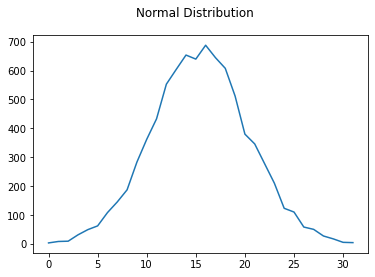

In [3]:
q = QuantumRegister(qubits,'q')
c = ClassicalRegister(qubits,'c')

print("\n Normal Distribution")
print("-----------------")

circuit = QuantumCircuit(q,c)
normal = NormalDistribution(num_qubits = qubits, mu=0, sigma=0.1, bounds=([-1,1]))
circuit.append(normal, list(range(qubits)))
circuit.measure(q,c)

job = execute(circuit, backend, shots=8192)
job_monitor(job)
counts = job.result().get_counts()

print(counts)
sortedcounts = []
sortedkeys = sorted(counts)

for i in sortedkeys:
    for j in counts:
        if(i == j):
            sortedcounts.append(counts.get(j))

plt.suptitle('Normal Distribution')
plt.plot(sortedcounts)
plt.show()



In [4]:
probability_distribution(counts)

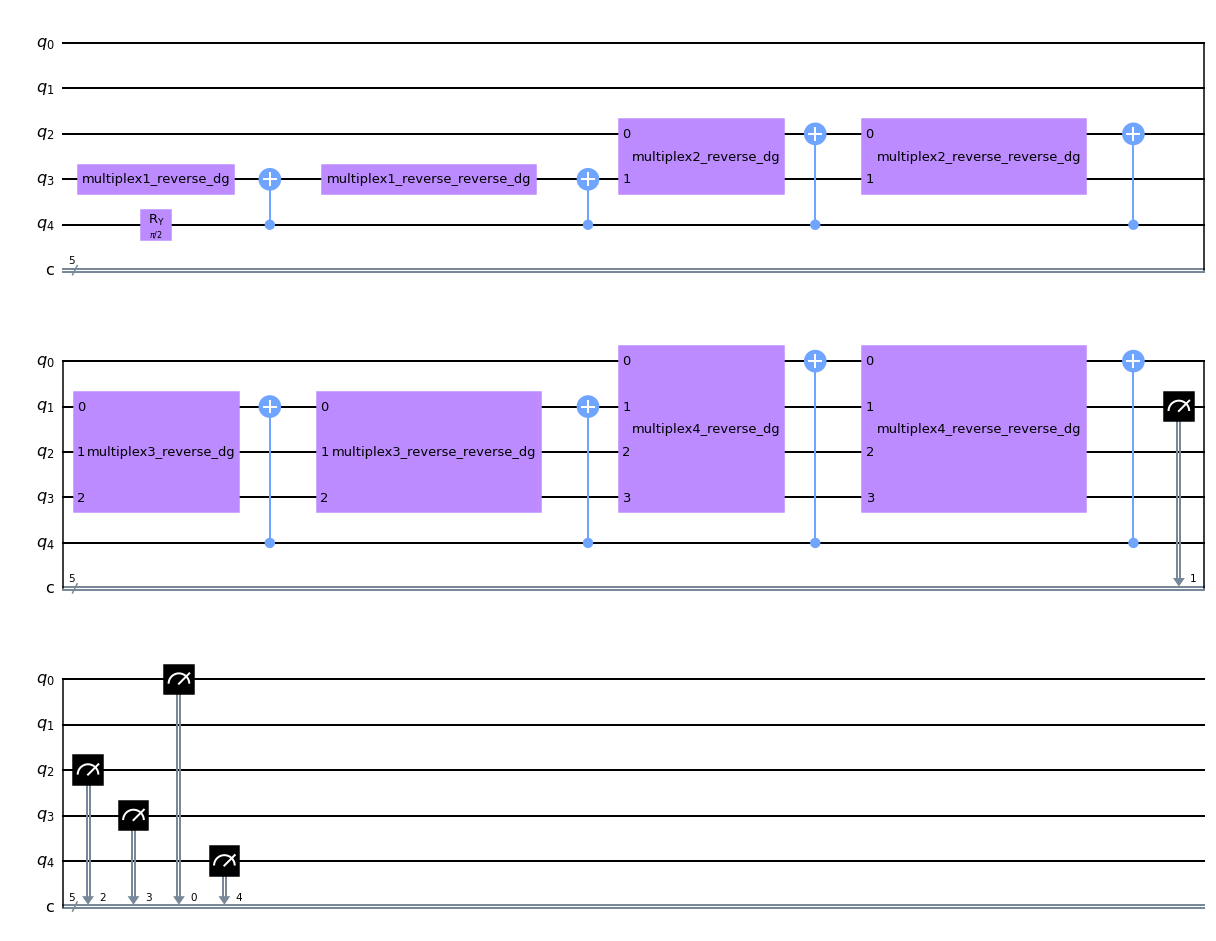

In [5]:
circuit.decompose().decompose().draw('mpl')

## Uniform Distribution

$$ \mathcal{P}_X |0\rangle^{\otimes n} = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n - 1} |x\rangle $$

https://qiskit.org/documentation/stubs/qiskit.circuit.library.UniformDistribution.html#qiskit.circuit.library.UniformDistribution

![Uniform Distribution](uniform_dist.png)


 Uniform Distribution
-----------------
Job Status: job has successfully run
{'00011': 265, '10111': 266, '00101': 252, '11011': 289, '00100': 271, '10011': 253, '11010': 250, '01000': 275, '00111': 264, '00000': 245, '01110': 247, '00110': 236, '11001': 246, '10001': 251, '00001': 227, '01011': 232, '11110': 261, '10110': 242, '11111': 271, '10000': 224, '00010': 253, '10010': 252, '01001': 278, '01111': 270, '10101': 255, '11101': 264, '01101': 233, '01100': 290, '01010': 233, '10100': 279, '11100': 288, '11000': 230}
<ipython-input-6-a790fbc9a889>:5: DeprecationWarning:

`UniformDistribution` is deprecated as of version 0.17.0 and will be removed no earlier than 3 months after the release date. It moved to qiskit_finance.circuit.library.UniformDistribution.



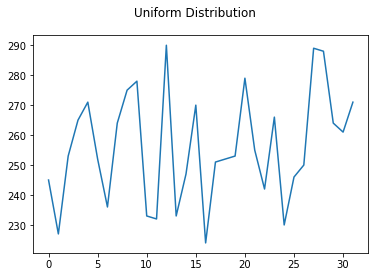

In [6]:
print("\n Uniform Distribution")
print("-----------------")

circuit = QuantumCircuit(q,c)
uniform = UniformDistribution(num_qubits = qubits)
circuit.append(uniform, list(range(qubits)))
circuit.measure(q,c)

job = execute(circuit, backend, shots=8192)
job_monitor(job)
counts = job.result().get_counts()

print(counts)

sortedcounts = []
sortedkeys = sorted(counts)

for i in sortedkeys:
    for j in counts:
        if(i == j):
            sortedcounts.append(counts.get(j))
            
plt.suptitle('Uniform Distribution')
plt.plot(sortedcounts)
plt.show()


In [7]:
probability_distribution(counts)

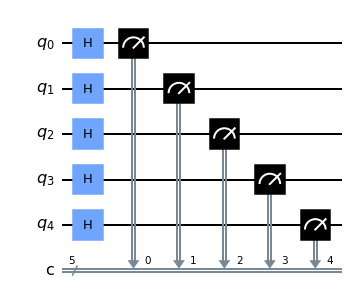

In [8]:
circuit.decompose().draw('mpl')

## Log Normal Distribution

$$ \mathbb{P}(X = x) = \frac{1}{x\sqrt{2\pi\sigma^2}} e^{-\frac{(\log(x) - \mu)^2}{\sigma^2}} $$ 

https://qiskit.org/documentation/stubs/qiskit.circuit.library.LogNormalDistribution.html#qiskit.circuit.library.LogNormalDistribution

![Logaritmic Distribution](log_dist.png)


 Log-Normal Distribution
-----------------
Job Status: job has successfully run
{'10101': 300, '11000': 171, '10001': 603, '01001': 272, '01111': 694, '10010': 505, '10000': 675, '01110': 721, '10100': 401, '10110': 259, '01100': 580, '11100': 66, '10111': 218, '01000': 156, '10011': 408, '01011': 554, '11001': 109, '00111': 62, '01010': 402, '01101': 711, '11111': 30, '11010': 94, '11011': 85, '11101': 53, '11110': 48, '00101': 2, '00110': 13}
<ipython-input-9-0b12613d919b>:5: DeprecationWarning:

`LogNormalDistribution` is deprecated as of version 0.17.0 and will be removed no earlier than 3 months after the release date. It moved to qiskit_finance.circuit.library.LogNormalDistribution.



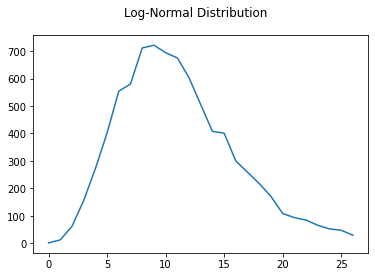

In [9]:
print("\n Log-Normal Distribution")
print("-----------------")

circuit = QuantumCircuit(q,c)
lognorm = LogNormalDistribution(num_qubits = qubits, mu=0, sigma=0.1, bounds=([0,2]))
circuit.append(lognorm, list(range(qubits)))
circuit.measure(q,c)

job = execute(circuit, backend, shots=8192)
job_monitor(job)
counts = job.result().get_counts()

print(counts)

sortedcounts = []
sortedkeys = sorted(counts)

for i in sortedkeys:
    for j in counts:
        if(i == j):
            sortedcounts.append(counts.get(j))

plt.suptitle('Log-Normal Distribution')
plt.plot(sortedcounts)
plt.show()

In [10]:
probability_distribution(counts)

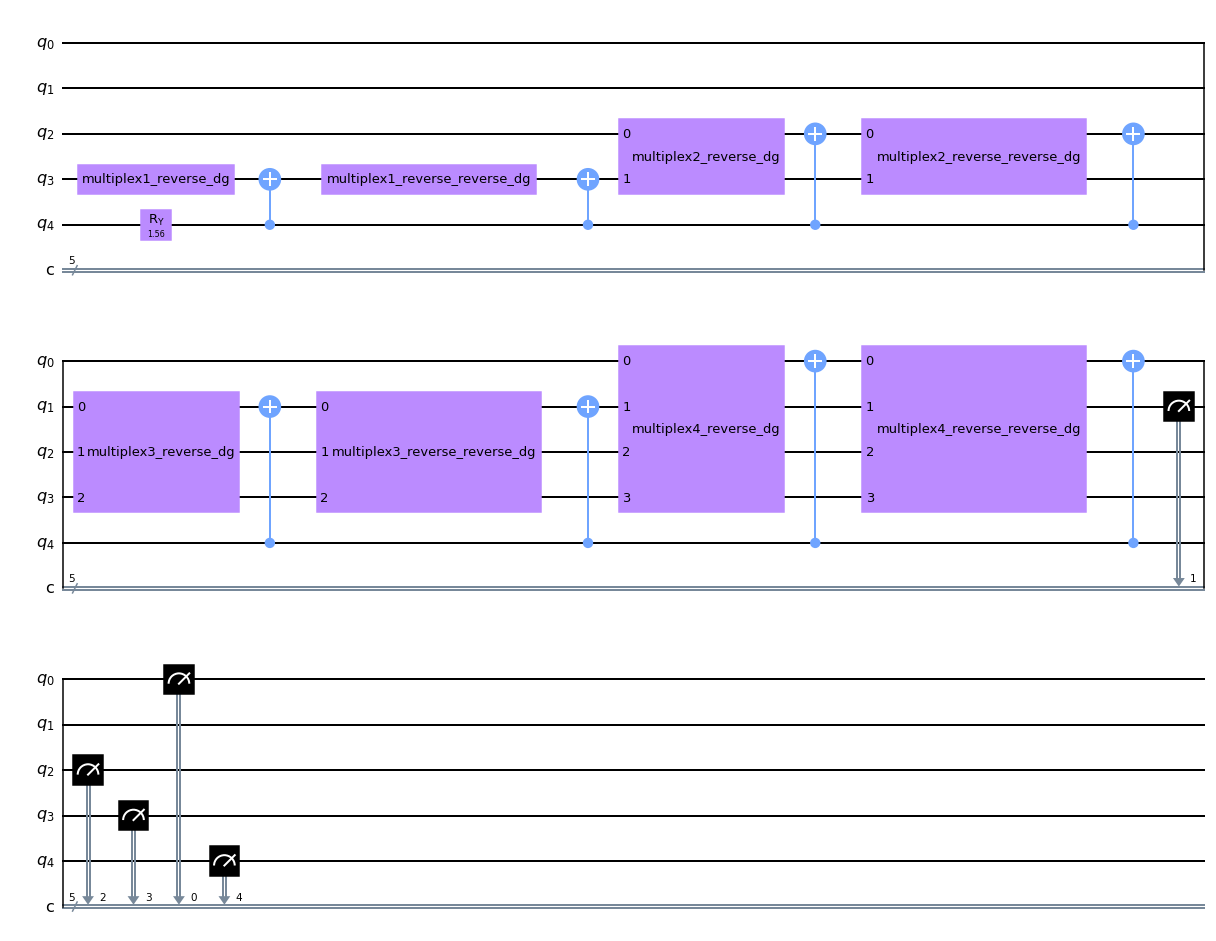

In [11]:
circuit.decompose().decompose().draw('mpl')

## Gaussian Conditional Independence Model

Given a value 𝑧 sampled from a latent random variable 𝑍 following a standard normal distribution, the default probability of asset 𝑘 is given by

$$ p_k(z) = F\left( \frac{F^{-1}(p_k^0) - \sqrt{\rho_k}z}{\sqrt{1 - \rho_k}} \right) $$

F denotes the cumulative distribution function of 𝑍, 𝑝0𝑘 is the default probability of asset 𝑘 for 𝑧=0 and 𝜌𝑘 is the sensitivity of the default probability of asset 𝑘 with respect to 𝑍. Thus, given a concrete realization of 𝑍 the individual default events are assumed to be independent from each other.

https://qiskit.org/documentation/tutorials/finance/09_credit_risk_analysis.html?highlight=gaussian%20conditional

/Users/sergiogago/opt/anaconda3/lib/python3.8/site-packages/qiskit/finance/__init__.py:50: DeprecationWarning:

The package qiskit.finance is deprecated. It was moved/refactored to qiskit_finance (pip install qiskit-finance). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>

/Users/sergiogago/opt/anaconda3/lib/python3.8/site-packages/qiskit/finance/applications/gaussian_conditional_independence_model.py:83: DeprecationWarning:

`NormalDistribution` is deprecated as of version 0.17.0 and will be removed no earlier than 3 months after the release date. It moved to qiskit_finance.circuit.library.NormalDistribution.


 Gaussian Conditional Independence Distribution
-----------------
Job Status: job has successfully run
{'0010001': 652, '0110011': 26, '1110001': 24, '0001110': 543, '0001011': 182, '0101111': 111, '1001010': 52, '0010000': 745, '1010101': 25, '0001100': 300, '1001111': 228, '1101001': 18, '1001000': 24, '0001101': 420, '0

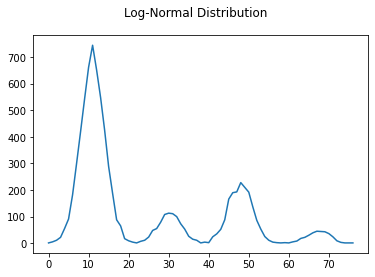

In [12]:
from qiskit.finance.applications import GaussianConditionalIndependenceModel as GCI

print("\n Gaussian Conditional Independence Distribution")
print("-----------------")

# set problem parameters
n_z = qubits
z_max = qubits
#p_zeros = [0.15, 0.25, 0.09, 0.05, 0.01]
#rhos = [0.1, 0.05, 0.04, 0.03, 0.01]

p_zeros = [0.15, 0.25]
rhos = [0.1, 0.05]

circuit = GCI(n_z, z_max, p_zeros, rhos)

circuit.measure_all()

job = execute(circuit, backend, shots=8192)
job_monitor(job)
counts = job.result().get_counts()

print(counts)

sortedcounts = []
sortedkeys = sorted(counts)

for i in sortedkeys:
    for j in counts:
        if(i == j):
            sortedcounts.append(counts.get(j))

plt.suptitle('Log-Normal Distribution')
plt.plot(sortedcounts)
plt.show()



In [13]:
probability_distribution(counts)